In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from mpl_toolkits.mplot3d import Axes3D
import netCDF4
import numpy
import os
import pandas
from PIL import Image
import random
import readline
import scipy
from scipy import fft
from scipy import linalg
from scipy import stats
from scipy.stats import poisson, ttest_ind
import seaborn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import normalize
from statsmodels.tsa.ar_model import AutoReg
import xarray as xr

In [2]:
Diri = '/glade/u/home/whimkao//ExtraTrack/Output_Files/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri):
    Data_DF = Open_File(Diri+Model+'_Data_Output_V4.csv')
    ET_DF = Open_File(Diri+Model+'_ET_Output_V4.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output_V4.csv')
    Storms_DF = Open_File(Diri+Model+'_Storms_Output_V4.csv')
    Time = []
    Start_Time = []
    End_Time = []
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Start_Time.append(Datetime(ET_DF["Start Time"][j]))
        End_Time.append(Datetime(ET_DF["End Time"][j]))
    Start_Time_All = []
    End_Time_All = []
    for k in range(len(Storms_DF)):
        Start_Time_All.append(Datetime(Storms_DF["Start Time"][k]))
        if type(Storms_DF["End Time"][k]) == str:
            End_Time_All.append(Datetime(Storms_DF["End Time"][k]))
        else:
            End_Time_All.append(numpy.nan)
    Data_DF["Time(Z)"] = Time
    ET_DF["Start Time"] = Start_Time
    ET_DF["End Time"] = End_Time
    Storms_DF["Start Time"] = Start_Time_All
    Storms_DF["End Time"] = End_Time_All
    return (Data_DF, ET_DF, Codes_DF, Storms_DF)

In [5]:
def Datetime(Time):
    New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    return (New_Time)

In [6]:
Control_Data, Control_ET, Control_Codes, Control_Storms = Files_Open("Control", Diri)
RCP45_Data, RCP45_ET, RCP45_Codes, RCP45_Storms = Files_Open("RCP45", Diri)
RCP85_Data, RCP85_ET, RCP85_Codes, RCP85_Storms = Files_Open("RCP85", Diri)

In [7]:
Control_Data[265:277]

Code   Name    Lon    Lat  SLP(hPa)  Winds(m/s)      B     VLT  \
265  TC190105  Lydia -60.54  28.77    920.25        64.4  -3.11  372.15   
266  TC190105  Lydia -60.94  28.96    919.96        65.9  -5.57  372.20   
267  TC190105  Lydia -61.51  29.14    917.78        65.1  -4.46  370.60   
268  TC190105  Lydia -61.38  29.60    916.02        67.2  -3.70  367.19   
269  TC190105  Lydia -60.97  29.81    913.33        69.7  -2.31  364.90   
270  TC190105  Lydia -60.56  30.26    918.92        60.6  -2.41  364.34   
271  TC190105  Lydia -59.94  30.82    923.42        63.6   3.00  358.99   
272  TC190105  Lydia -59.85  31.73    921.07        57.2   5.25  351.29   
273  TC190105  Lydia -59.54  32.75    925.31        57.5   7.92  349.72   
274  TC190105  Lydia -59.99  33.40    929.70        50.7  11.02  335.03   
275  TC190105  Lydia -60.24  34.14    936.19        49.3  14.35  319.18   
276  TC190105  Lydia -60.24  34.53    937.54        44.8  12.58  301.92   

        VUT             Time(Z) Storm Phase  
265  446.44 1901-09-23 00:00:00    Tropical  
266  460.03 1901-09-23 06:00:00    Tropical  
267  471.26 1901-09-23 12:00:00    Tropical  
268  472.79 1901-09-23 18:00:00    Tropical  
269  468.96 1901-09-24 00:00:00    Tropical  
270  463.49 1901-09-24 06:00:00    Tropical  
271  457.63 1901-09-24 12:00:00    Tropical  
272  451.37 1901-09-24 18:00:00    Tropical  
273  434.34 1901-09-25 00:00:00    Tropical  
274  417.31 1901-09-25 06:00:00    Tropical  
275  400.70 1901-09-25 12:00:00    Tropical  
276  379.11 1901-09-25 18:00:00    Tropical

In [8]:
Control_ET[5:8]

Code    Name  Path Type          Start Time            End Time  \
5  TC190105   Lydia          1 1901-09-27 12:00:00 1901-09-29 18:00:00   
6  TC190106   Mario          1 1901-09-22 00:00:00 1901-09-22 18:00:00   
7  TC190107  Nicole          2 1901-10-14 12:00:00 1901-10-15 00:00:00   

   Min SLP  Start SLP  End SLP  Start Lon  Start Lat  End Lon  End Lat  \
5   913.33     953.76   970.00     -53.37      39.19   -42.82    48.53   
6   988.80     993.69   991.98     -78.47      35.78   -71.20    41.68   
7   974.56    1015.94  1019.52     -22.00      42.00   -26.00    41.25   

   ET Dist (km)  ET Duration (hr)  Trop Duration (hr)  
5   1335.846025              54.0               384.0  
6    909.539822              18.0                72.0  
7    343.074813              12.0               246.0

In [9]:
Control_Codes[5:8]

ABC  Orig Code  New Code    Name
5   A         89  TC190105   Lydia
6   A         90  TC190106   Mario
7   A         95  TC190107  Nicole

In [10]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
Lon_Bins = Create_Bins(-100,20,5)
Lat_Bins = Create_Bins(10,60,5)

In [11]:
Num_Years = numpy.array([90,93,93])

In [12]:
def Plot_Map_Formatting(Axis):
    Axis.coastlines(linewidth=0.5)
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
    x_Min = -100
    x_Max = 20
    y_Min = 10
    y_Max = 60
    x_Axis = Create_Bins(x_Min, x_Max, 10)
    y_Axis = Create_Bins(y_Min, y_Max, 10)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [13]:
# Create Function to Plot ET Start and End Locations
def Plot_ET_Locations(ET_DF, Model, Savefig):
    Fig = pyplot.figure(figsize=(16,13))
#
# Plot ET Start Locations
    Axis = Fig.add_subplot(2,1,1, projection=ccrs.PlateCarree())
    Start_Lons = ET_DF["Start Lon"]
    Start_Lats = ET_DF["Start Lat"]
    for k in range(len(Start_Lats)):
        pyplot.scatter(Start_Lons[k], Start_Lats[k], marker='s', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=48)
    Plot_Map_Formatting(Axis)
    Title = Model + " Extratropical Transition Initiation Locations"
    Axis.set_title(Title, fontsize=24)
#
# Plot ET End Data
    Axis = Fig.add_subplot(2,1,2, projection=ccrs.PlateCarree())
    End_Lons = ET_DF["End Lon"]
    End_Lats = ET_DF["End Lat"]
    for k in range(len(End_Lats)):
        pyplot.scatter(End_Lons[k], End_Lats[k], marker='^', linewidths=1.8, \
        facecolors='none', edgecolors='black', s=48)
    Plot_Map_Formatting(Axis)
    Title = Model + " Extratropical Transition Completion Locations"
    Axis.set_title(Title, fontsize=24)
#
# Save Fig
    if Savefig == True:
        Figname = str(Model + '_ET_Locations.png')
        Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

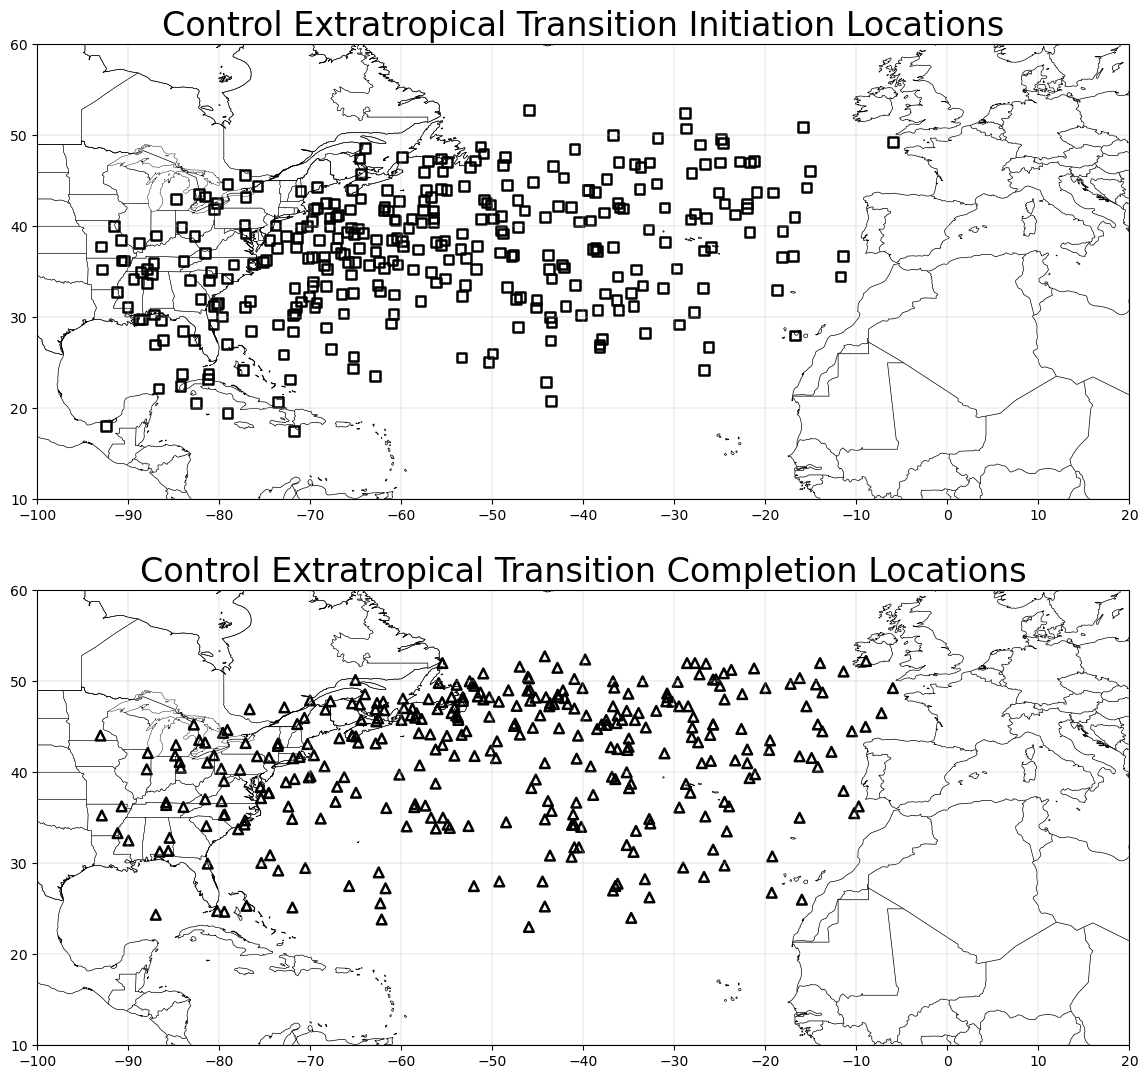

In [14]:
Plot_ET_Locations(Control_ET, "Control", True)

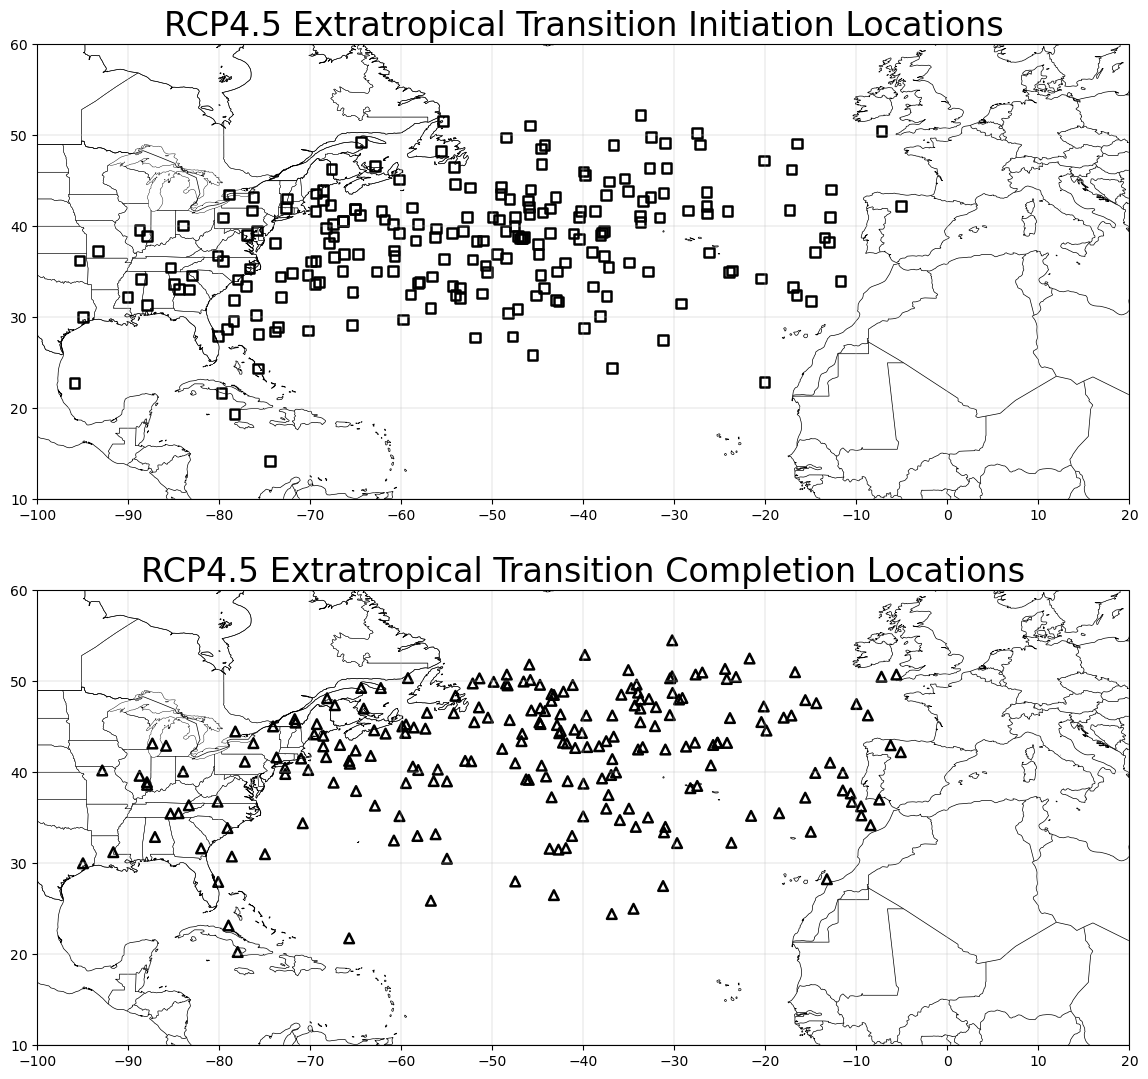

In [15]:
Plot_ET_Locations(RCP45_ET, "RCP4.5", True)

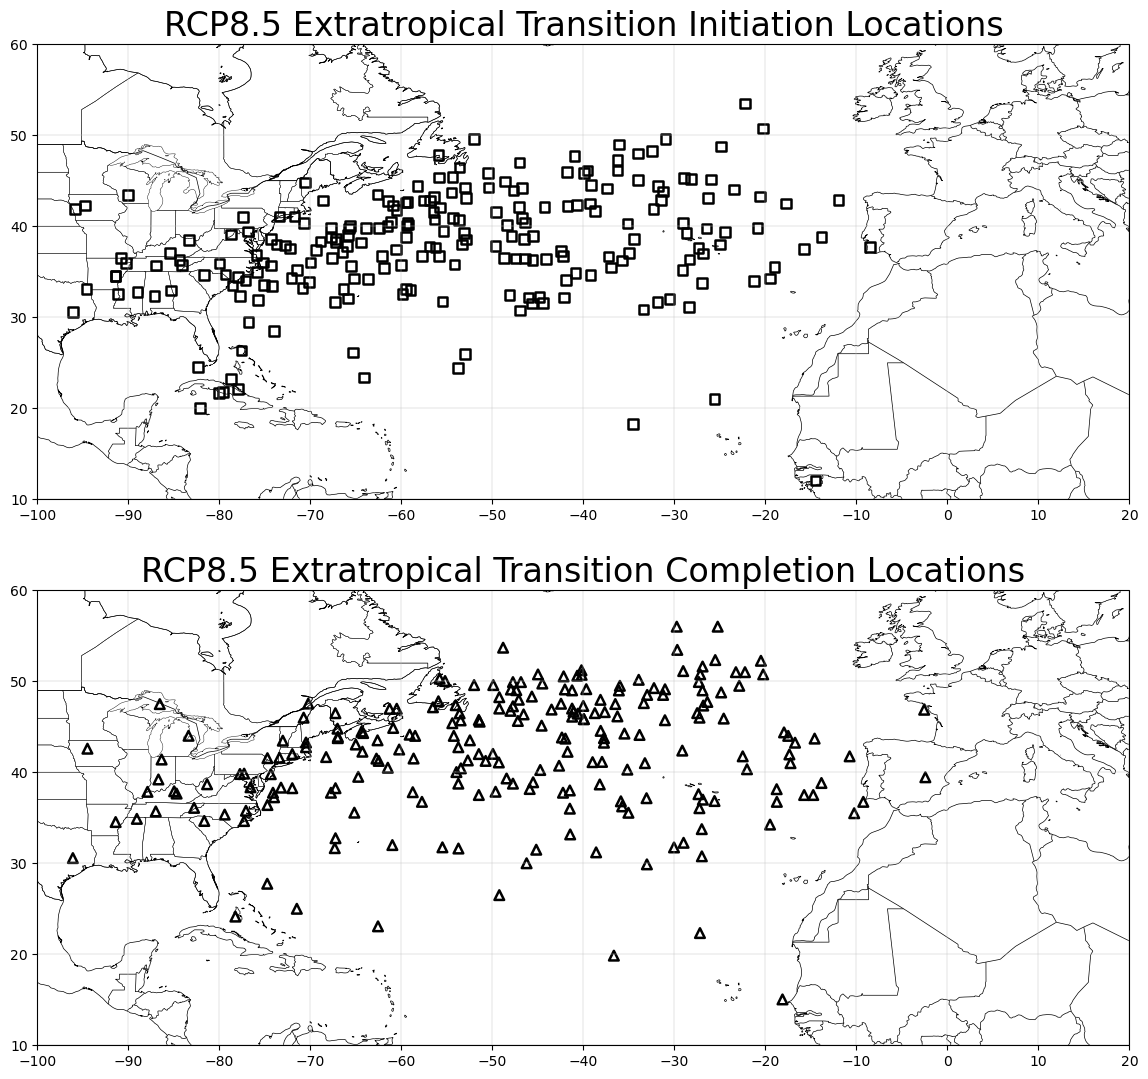

In [16]:
Plot_ET_Locations(RCP85_ET, "RCP8.5", True)

In [17]:
Lengths = numpy.zeros(3)
Lengths[0] = len(Control_ET)
Lengths[1] = len(RCP45_ET)
Lengths[2] = len(RCP85_ET)
#Lengths

In [18]:
# Create Function to Calculate Spatial Distribution of B Value
def ET_Locations_Distribution(ET_DF, Start, Length):
    Lon_Bins = Create_Bins(-100,20,5)
    Lat_Bins = Create_Bins(10,60,5)
    Lat_Lon_Count = numpy.zeros((len(Lat_Bins)-1, len(Lon_Bins)-1))
#
# Count Lat Lon Distribution in Each Gridbox
    if Start == True:
        Lats = ET_DF["Start Lat"]
        Lons = ET_DF["Start Lon"]
    else:
        Lats = ET_DF["End Lat"]
        Lons = ET_DF["End Lon"]
    for i in range(len(Lats)):
        for j in range(len(Lat_Bins)-1):
            if Lats[i] >= (Lat_Bins[j]-5) and Lats[i] <= (Lat_Bins[j+1]+5):
                for k in range(len(Lon_Bins)-1):
                    if Lons[i] >= (Lon_Bins[k]-5) and Lons[i] <= (Lon_Bins[k+1]+5):
                        Lat_Lon_Count[j][k] += 1
#    if Absolute == True:
#        return (Lat_Lon_Count)
#    else:
    Lat_Lon_Density = Lat_Lon_Count / Length / 90 * 10000
    return (Lat_Lon_Density)

In [19]:
# Create Function For Spatial Distribution Count Colours
Spatial_Count_Colours = ['lightskyblue', 'deepskyblue', 'dodgerblue', 'darkcyan', 'lightseagreen', \
'limegreen', 'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'red']
Spatial_Count_Bounds = numpy.array([0,2,5,10,15,20,30,40,50,60,70,80])
Spatial_Density_Colours = ['lightskyblue', 'deepskyblue', 'dodgerblue', 'darkcyan', 'lightseagreen', \
'limegreen', 'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'red']
Spatial_Density_Bounds = numpy.array([0,1,2,3,4,6,8,10,12,15,20,25])
#
def Spatial_Count_Colour(Count, Bounds, Colours):
    for k in range(len(Colours)):
        if Count == 0:
            Colour = 'white'
        else:
            if k != len(Colours)-1:
                if Count > Bounds[k] and Count <= Bounds[k+1]:
                    Colour = Colours[k]
            else:
                if Count > Bounds[k]:
                    Colour = Colours[k]
    return (Colour)

In [20]:
# Create Function to Plot ET Start and End Locations
def Plot_ET_Dist(Spatial_Start, Spatial_End, Model, Bounds, Colours, Savefig):
    Fig = pyplot.figure(figsize=(16,16))
    Lon_Bins = Create_Bins(-100,20,5)
    Lat_Bins = Create_Bins(10,60,5)
#
# Plot ET Start Data
    Axis = Fig.add_subplot(2,1,1, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_Start)):
        for k in range(len(Spatial_Start[0])):
            Colour = Spatial_Count_Colour(Spatial_Start[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis)
    Title = Model + " Extratropical Transition Initiation Spatial Distribution"
    Axis.set_title(Title, fontsize=24)
#
# Colour Bar
#    if Absolute == True:
#        Cbar_Label = 'Absolute Frequency (Per 90 Years)'
    Cbar_Label = 'Annual Relative Frequency (Per 10000 Data Points)'
    C_Map = mcolors.LinearSegmentedColormap.from_list("Relative Frequency of Locations", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='max')
    Cax = Axis.inset_axes([0.11, -0.12, 0.78, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
    label=Cbar_Label)
#
#
# Plot ET End Data
    Axis = Fig.add_subplot(2,1,2, projection=ccrs.PlateCarree())
    for j in range(len(Spatial_End)):
        for k in range(len(Spatial_End[0])):
            Colour = Spatial_Count_Colour(Spatial_End[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis)
    Title = Model + " Extratropical Transition Completion Spatial Distribution"
    Axis.set_title(Title, fontsize=24)
#
# Save Fig
    if Savefig == True:
        Figname = str(Model + '_ET_Spatial_Dist.png')
        Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

In [21]:
# Calculate Difference Between Models
def Spatial_Diff(Var1, Var2):
    Diff = numpy.zeros((len(Var1),len(Var1[0])))
    for i in range(len(Var1)):
        for j in range(len(Var1[0])):
            if Var1[i][j] != 0 or Var2[i][j] != 0:
                Diff[i][j] = Var1[i][j] - Var2[i][j]
            else:
                Diff[i][j] = 0
    return (Diff)

In [22]:
# Calculate Difference Between Models
def Spatial_Diff_New(Var_1, Var_2):
    Diff = Spatial_Diff_Smoothing(Var_1, Var_2)
    return (Diff)

In [23]:
# Calculate Difference Between Models
def Spatial_Diff_Smoothing(Var1, Var2):
    Diff = Var1 - Var2
    Sum = Var1 + Var2
    Diff_Smoothen = numpy.zeros((len(Diff), len(Diff[0])))
    for i in range(len(Diff)):
        F = len(Diff)-1
        for j in range(len(Diff[0])):
            G = len(Diff[0])-1
            if i > 0 and i < F and j > 0 and j < G:
                Orig_Diff = Diff[i][j]
                Orig_Sum = Sum[i][j]
                if Orig_Sum > 0.0001:
                    Surround_Diffs = numpy.array([Diff[i-1][j], Diff[i+1][j], Diff[i][j-1], Diff[i][j+1]])
                    Surround_Sums = numpy.array([Sum[i-1][j], Sum[i+1][j], Sum[i][j-1], Sum[i][j+1]])
                    Total_Sum = numpy.sum(Surround_Sums) + Orig_Sum * 6
                    if Total_Sum > 0.0001:
                        Orig_Ratio = Orig_Sum / Total_Sum
                        Surround_Ratios = Surround_Sums / Total_Sum
                        Ratioed_Diffs = Surround_Diffs * Surround_Ratios
                        Ratioed_Diff = numpy.sum(Ratioed_Diffs)
                        Diff_Smoothen[i][j] = Orig_Diff * Orig_Ratio + Ratioed_Diff * (1-Orig_Ratio)
                    else:
                        Diff_Smoothen[i][j] = Diff[i][j]
                else:
                    Diff_Smoothen[i][j] = 0
            else:
                Diff_Smoothen[i][j] = Diff[i][j]
    return (Diff_Smoothen)

In [24]:
Spatial_Diff_Colours = ['navy', 'mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lawngreen', \
'gold', 'orange', 'darkorange', 'orangered', 'red']
Spatial_Diff_Bounds = numpy.array([-4,-3,-2,-1,-0.3,0.3,1,2,3,4])
#Spatial_Diff_Bounds = numpy.array([-6,-4.5,-3,-1.5,-0.5,0.5,1.5,3,4.5,6])
def Spatial_Diff_Colour(Diff, Bounds, Colours):
    for k in range(len(Colours)):
        if Diff == 0:
            Colour = 'white'
        else:
            if k == 0:
                if Diff <= Bounds[k]:
                    Colour = Colours[k]
            elif k < len(Colours)-1:
                if Diff <= Bounds[k] and Diff > Bounds[k-1]:
                    Colour = Colours[k]
            else:
                if Diff > Bounds[k-1]:
                    Colour = Colours[k]
    return (Colour)

In [25]:
# Create Function to Plot ET Start and End Locations
def Plot_ET_Dist_Diff(Start_1, Start_2, End_1, End_2, Model_1, Model_2, Bounds, Colours, New, Savefig):
# Apply Difference Between Models Function
    Start_Diff = numpy.zeros((len(Start_1),len(Start_1[0])))
    End_Diff = numpy.zeros((len(End_1),len(End_1[0])))
    if New == False:
        Start_Diff = Spatial_Diff(Start_1, Start_2)
        End_Diff = Spatial_Diff(End_1, End_2)
    else:
        Start_Diff = Spatial_Diff_New(Start_1, Start_2)
        End_Diff = Spatial_Diff_New(End_1, End_2)
#        print (Diff)
#
# Plot ET Start Data
    Fig = pyplot.figure(figsize=(16,16))
    Axis = Fig.add_subplot(2,1,1, projection=ccrs.PlateCarree())
    Lon_Bins = Create_Bins(-100,20,5)
    Lat_Bins = Create_Bins(10,60,5)
    for j in range(len(Start_Diff)):
        for k in range(len(Start_Diff[0])):
            Colour = Spatial_Diff_Colour(Start_Diff[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis)
    Title = Model_1 + " - " + Model_2 + " Difference ET Transition Initiation Spatial Distribution"
    Axis.set_title(Title, fontsize=24)
#
# Colour Bar
    Cbar_Label = 'Annual Relative Frequency Difference (Per 10000 Data Points)'
    C_Map = mcolors.LinearSegmentedColormap.from_list("Relative Frequency of Locations", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([0.11, -0.12, 0.78, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
    label=Cbar_Label)
#
# Plot ET End Data
    Axis = Fig.add_subplot(2,1,2, projection=ccrs.PlateCarree())
    for j in range(len(End_Diff)):
        for k in range(len(End_Diff[0])):
            Colour = Spatial_Diff_Colour(End_Diff[j][k], Bounds, Colours)
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis)
    Title = Model_1 + " - " + Model_2 + " Difference ET Transition Completion Spatial Distribution"
    Axis.set_title(Title, fontsize=24)
#
# Save Fig
    if Savefig == True:
        Figname = str(Model_1 + '-' + Model_2 + '_ET_Spatial_Diff.png')
        Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

In [26]:
Control_ET_Start_Density = ET_Locations_Distribution(Control_ET, True, Lengths[0])
RCP45_ET_Start_Density = ET_Locations_Distribution(RCP45_ET, True, Lengths[1])
RCP85_ET_Start_Density = ET_Locations_Distribution(RCP85_ET, True, Lengths[2])

In [27]:
Control_ET_End_Density = ET_Locations_Distribution(Control_ET, False, Lengths[0])
RCP45_ET_End_Density = ET_Locations_Distribution(RCP45_ET, False, Lengths[1])
RCP85_ET_End_Density = ET_Locations_Distribution(RCP85_ET, False, Lengths[2])

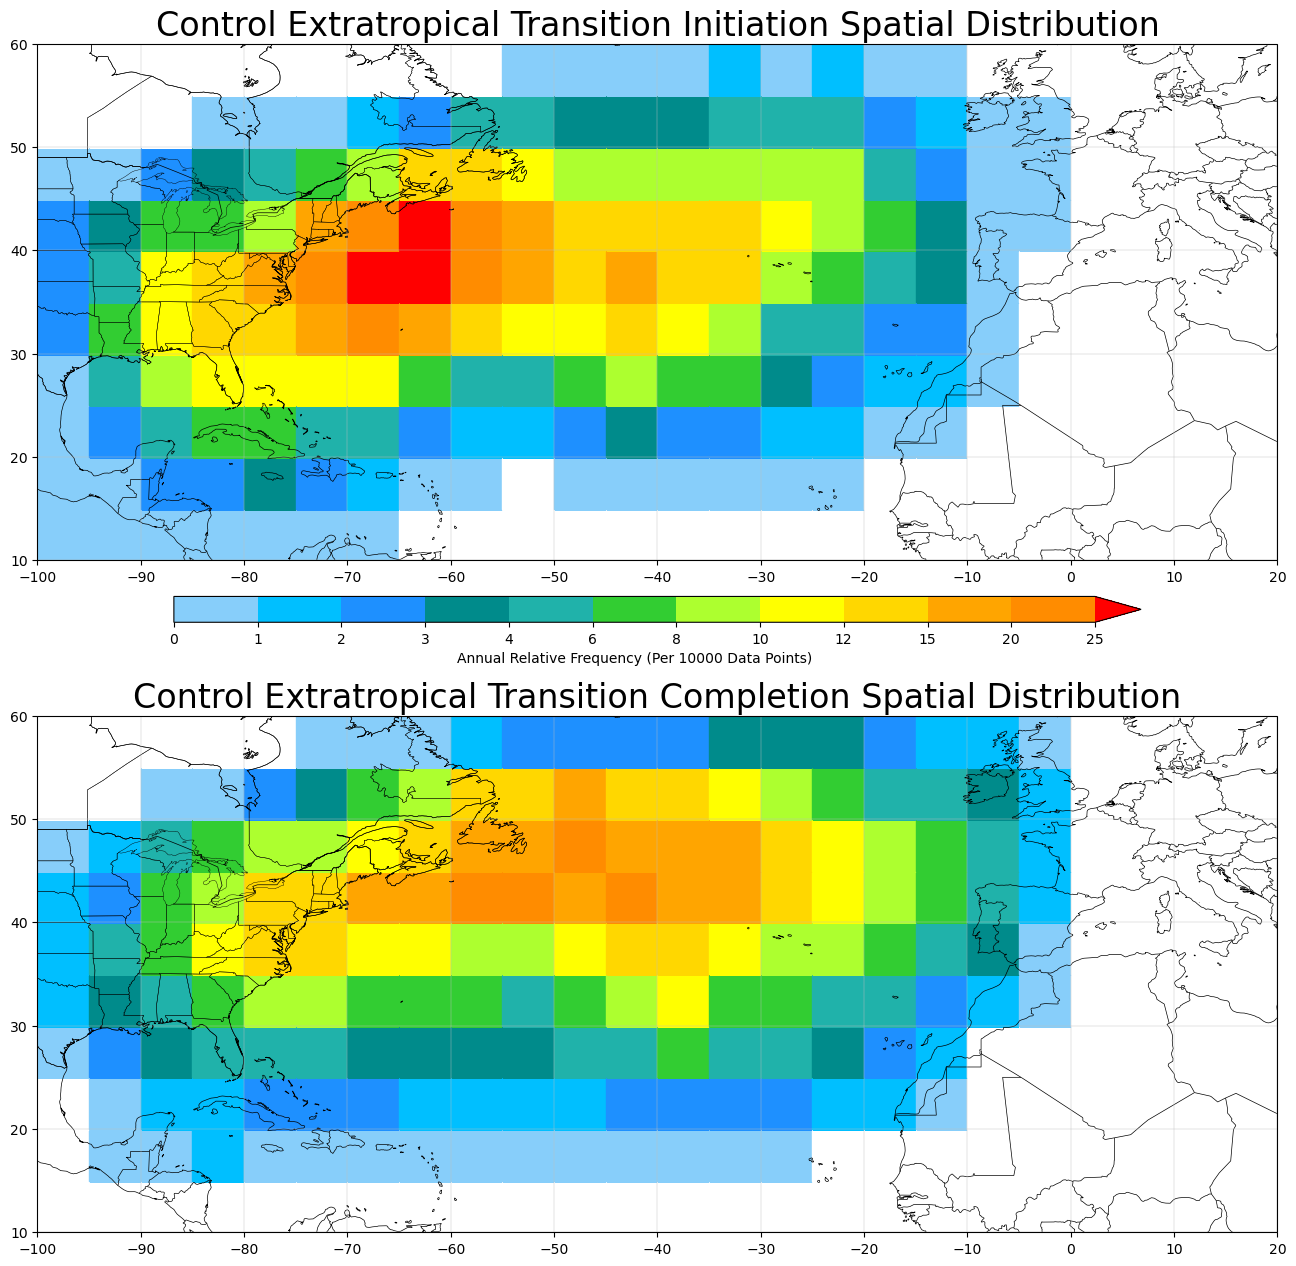

In [28]:
Plot_ET_Dist(Control_ET_Start_Density, Control_ET_End_Density, "Control", Spatial_Density_Bounds, Spatial_Density_Colours, True)

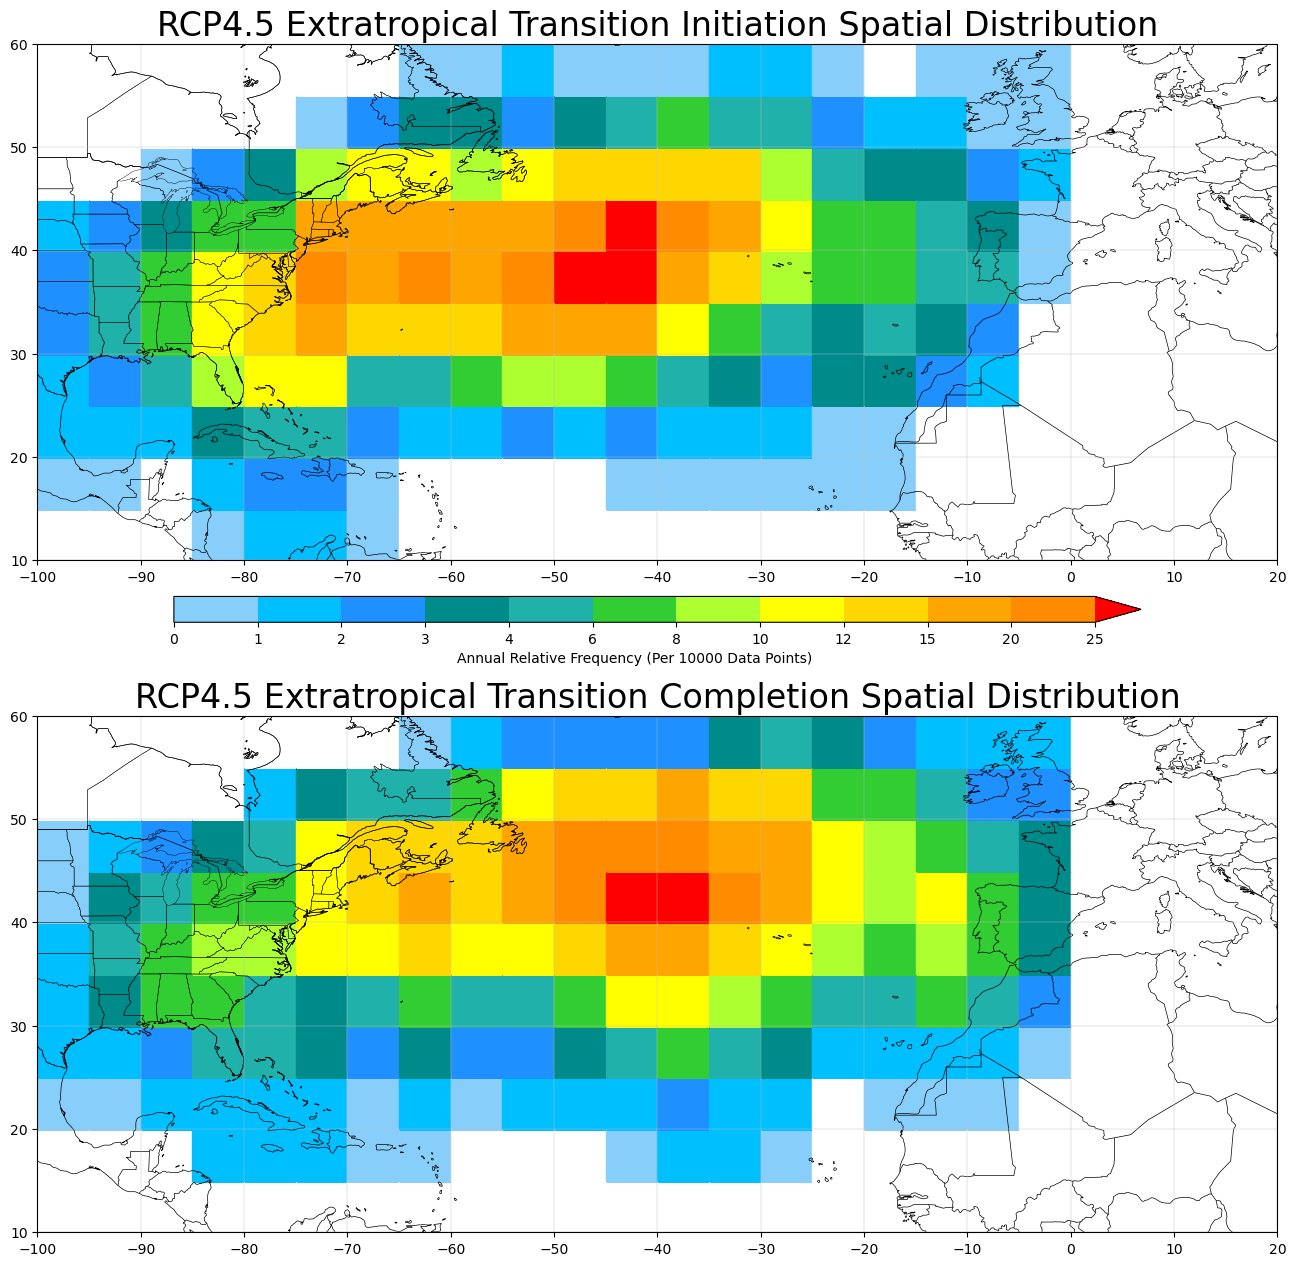

In [29]:
Plot_ET_Dist(RCP45_ET_Start_Density, RCP45_ET_End_Density, "RCP4.5", Spatial_Density_Bounds, Spatial_Density_Colours, True)

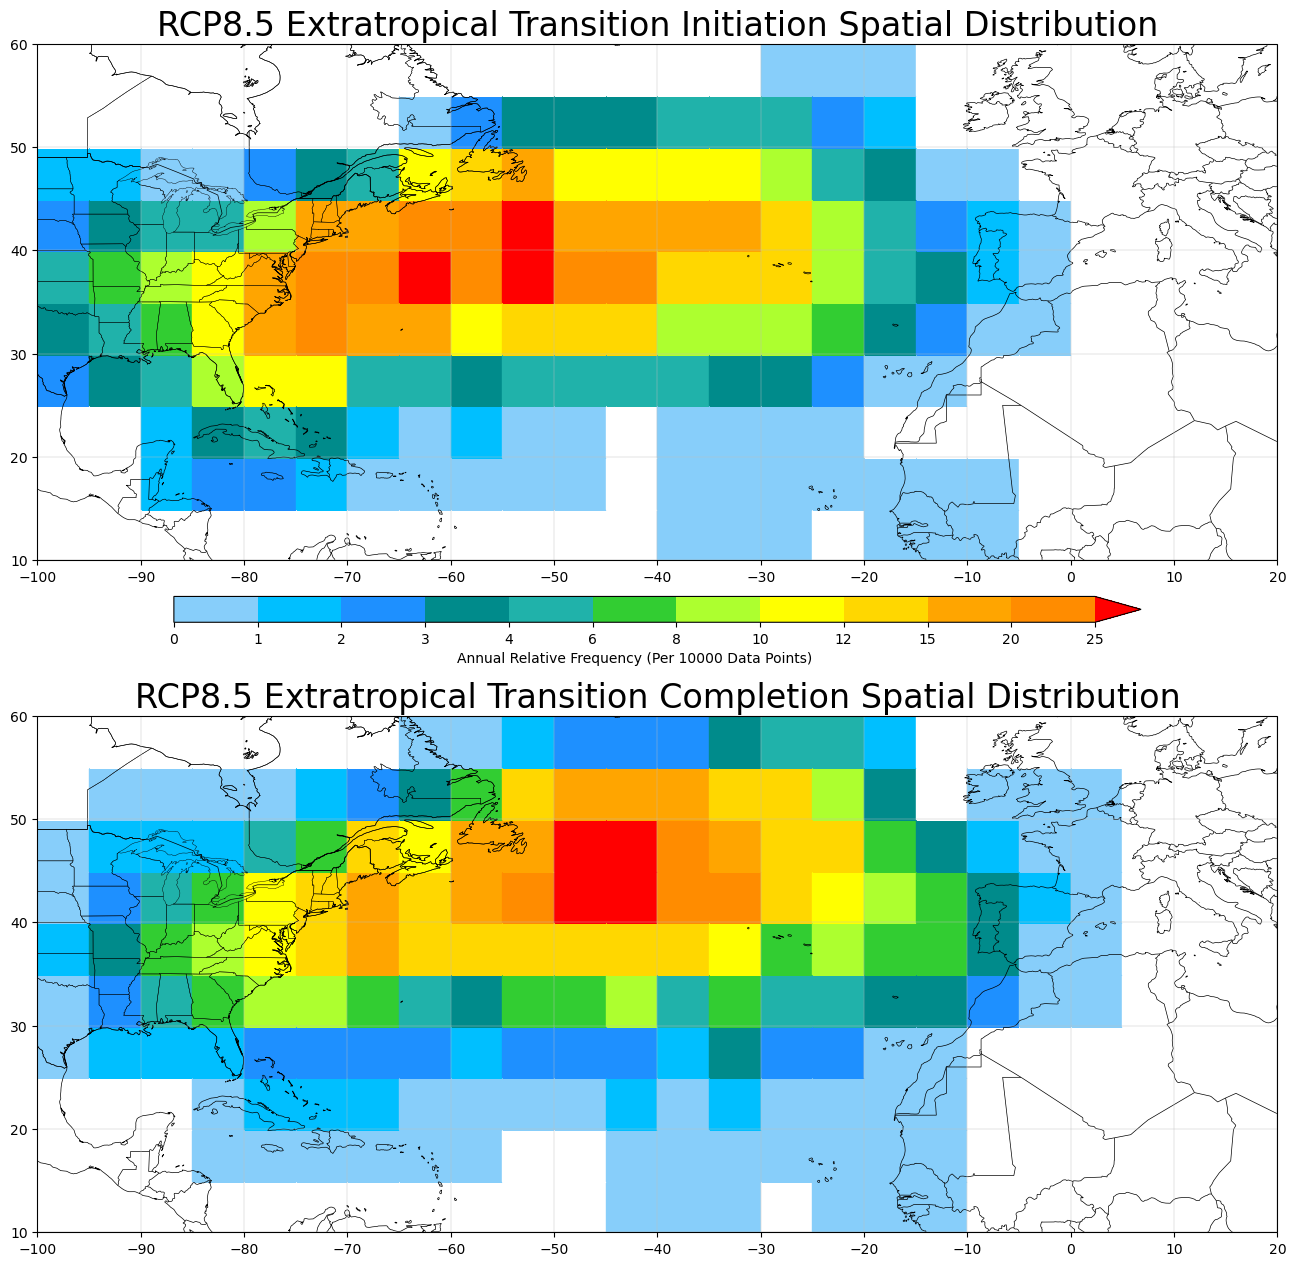

In [30]:
Plot_ET_Dist(RCP85_ET_Start_Density, RCP85_ET_End_Density, "RCP8.5", Spatial_Density_Bounds, Spatial_Density_Colours, True)

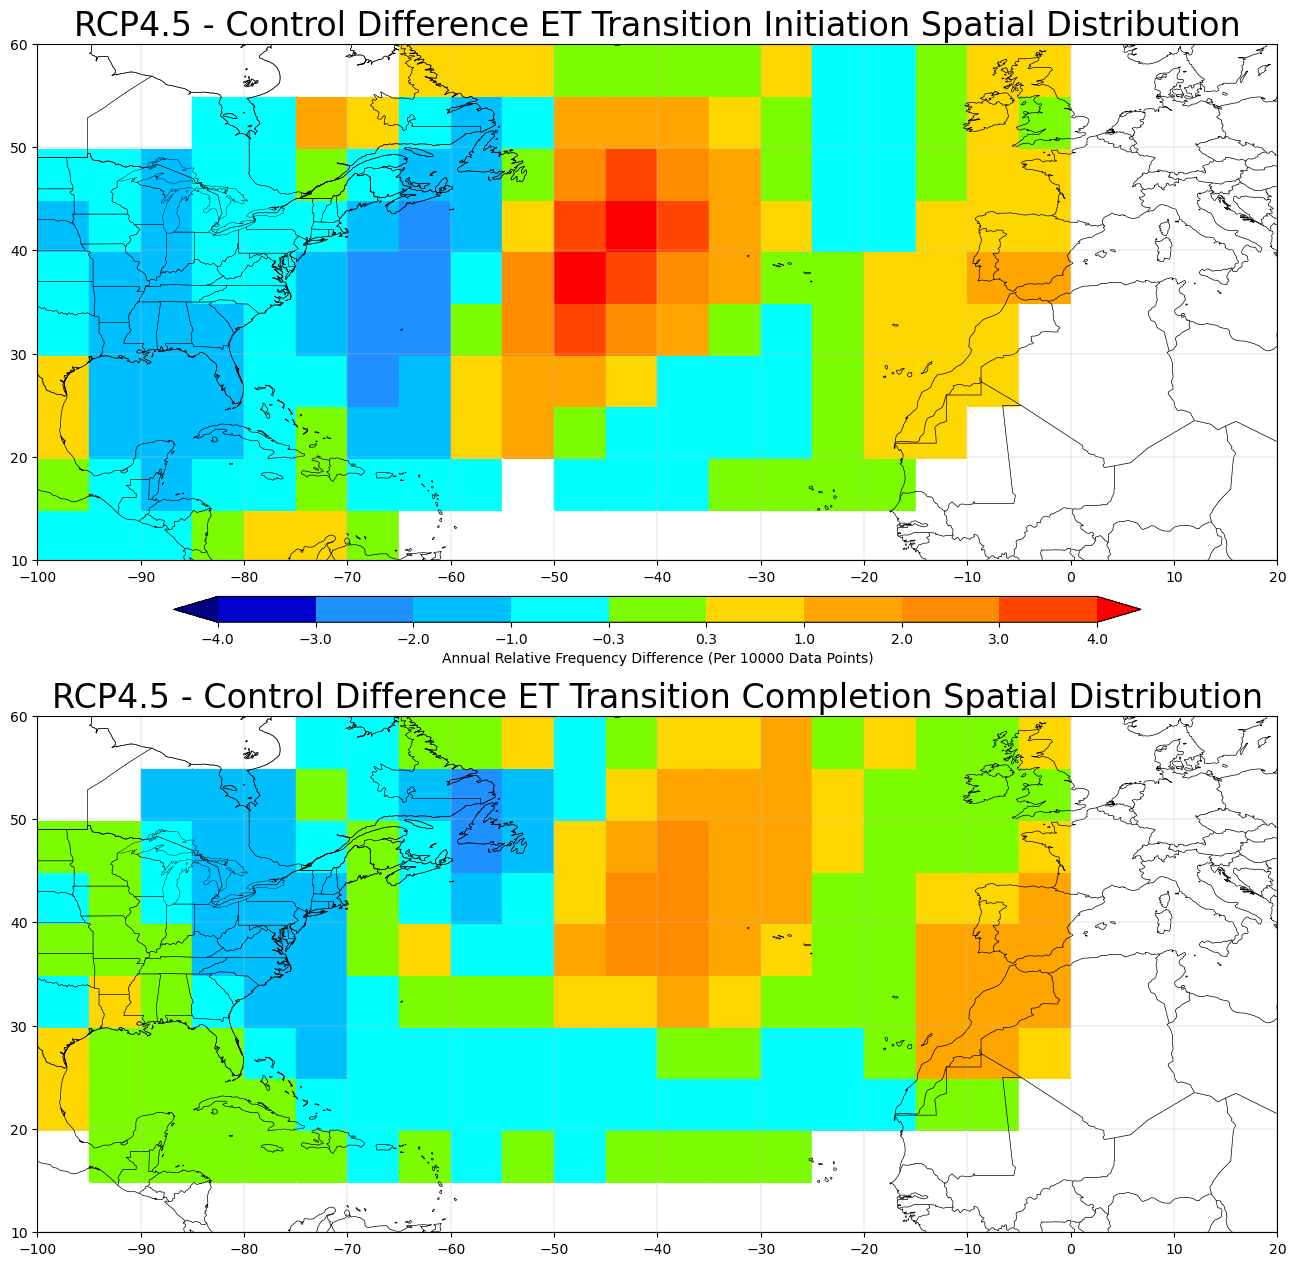

In [31]:
# With Smoothing
Plot_ET_Dist_Diff(RCP45_ET_Start_Density, Control_ET_Start_Density, RCP45_ET_End_Density, \
Control_ET_End_Density, "RCP4.5", "Control", Spatial_Diff_Bounds, Spatial_Diff_Colours, True, True)

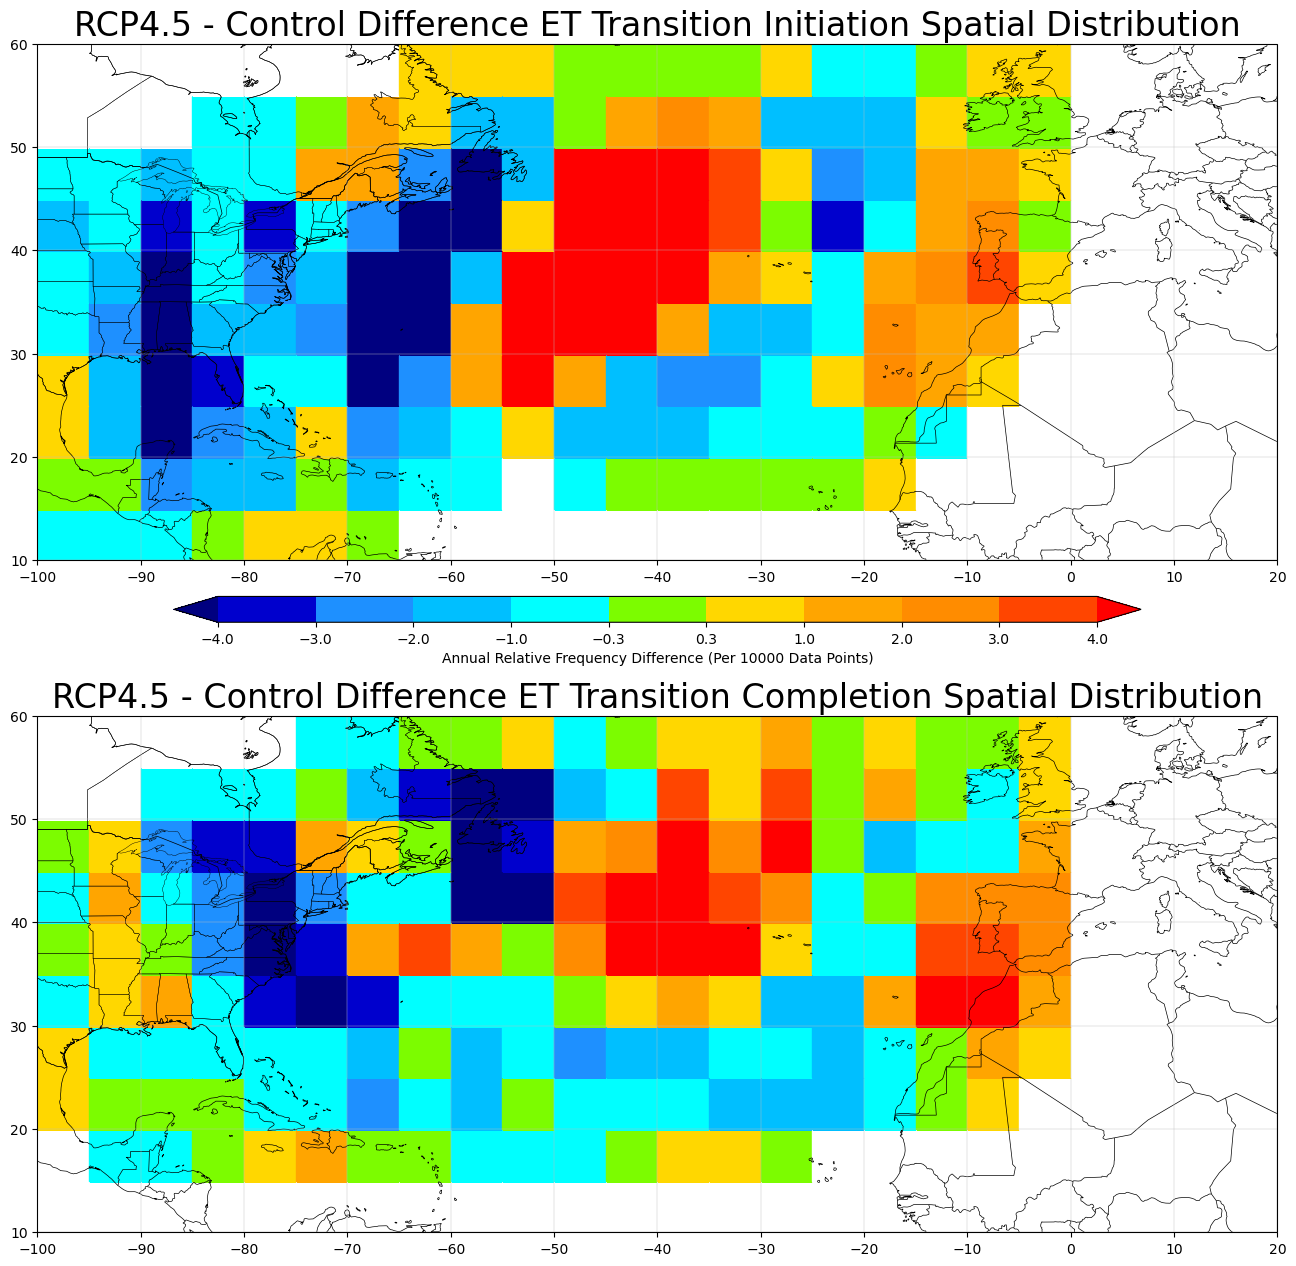

In [32]:
# No Smoothing
Plot_ET_Dist_Diff(RCP45_ET_Start_Density, Control_ET_Start_Density, RCP45_ET_End_Density, \
Control_ET_End_Density, "RCP4.5", "Control", Spatial_Diff_Bounds, Spatial_Diff_Colours, False, False)

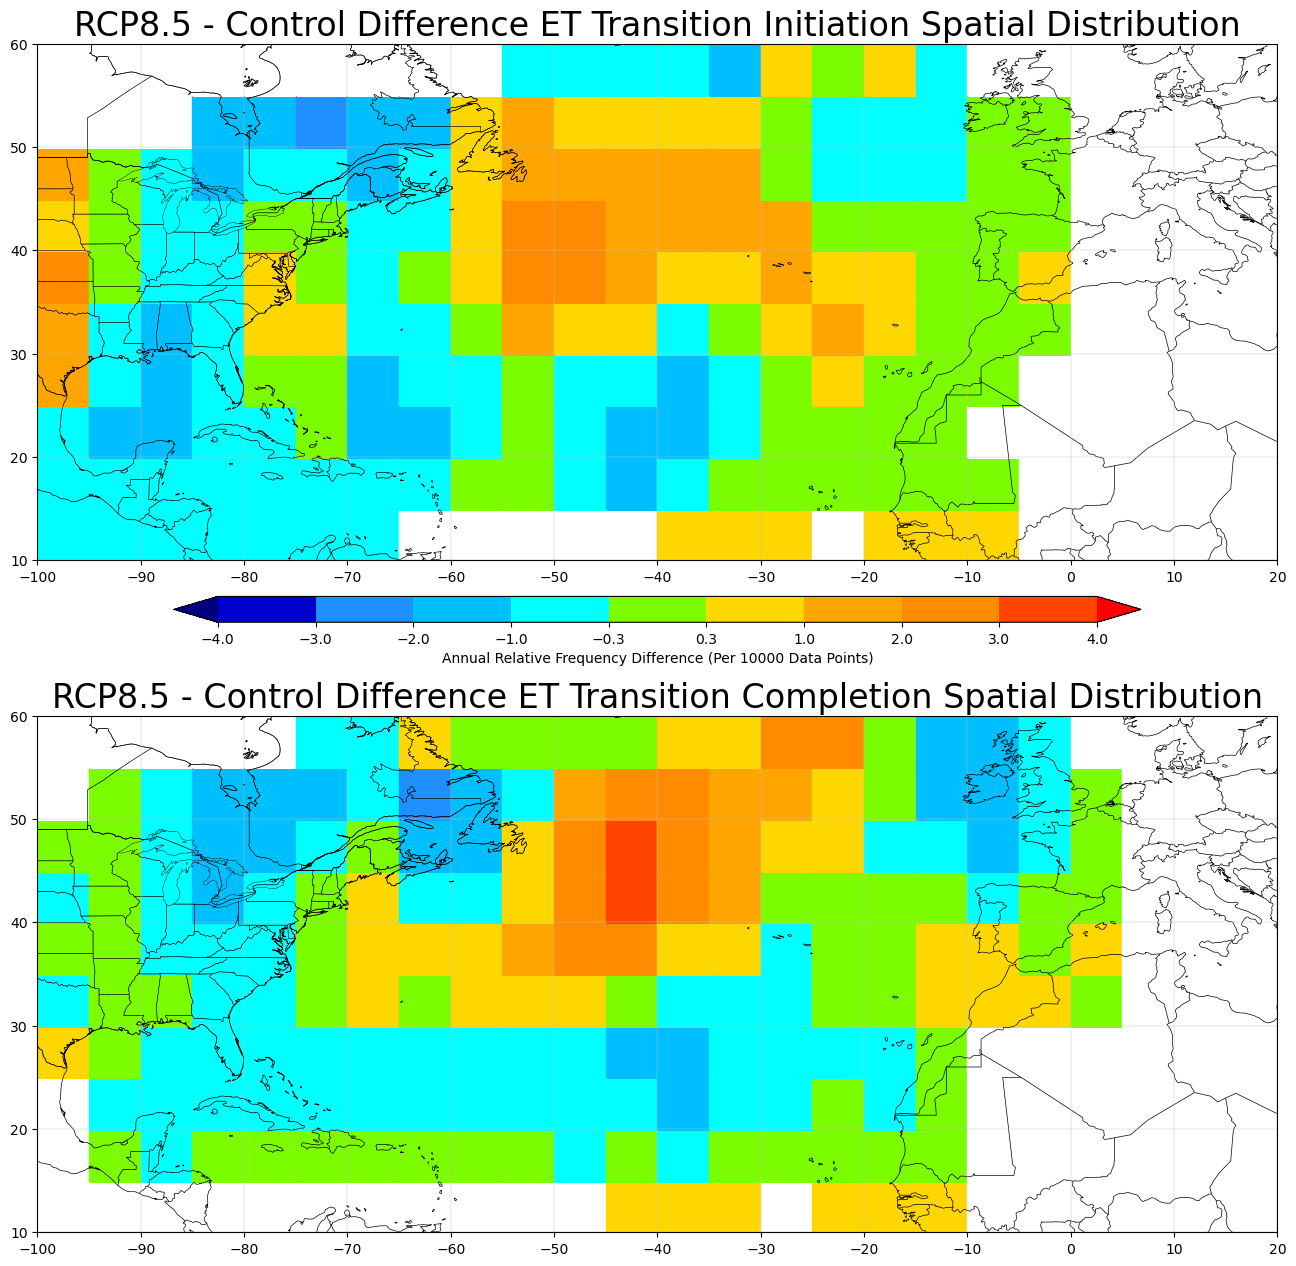

In [33]:
# With Smoothing
Plot_ET_Dist_Diff(RCP85_ET_Start_Density, Control_ET_Start_Density, RCP85_ET_End_Density, \
Control_ET_End_Density, "RCP8.5", "Control", Spatial_Diff_Bounds, Spatial_Diff_Colours, True, True)

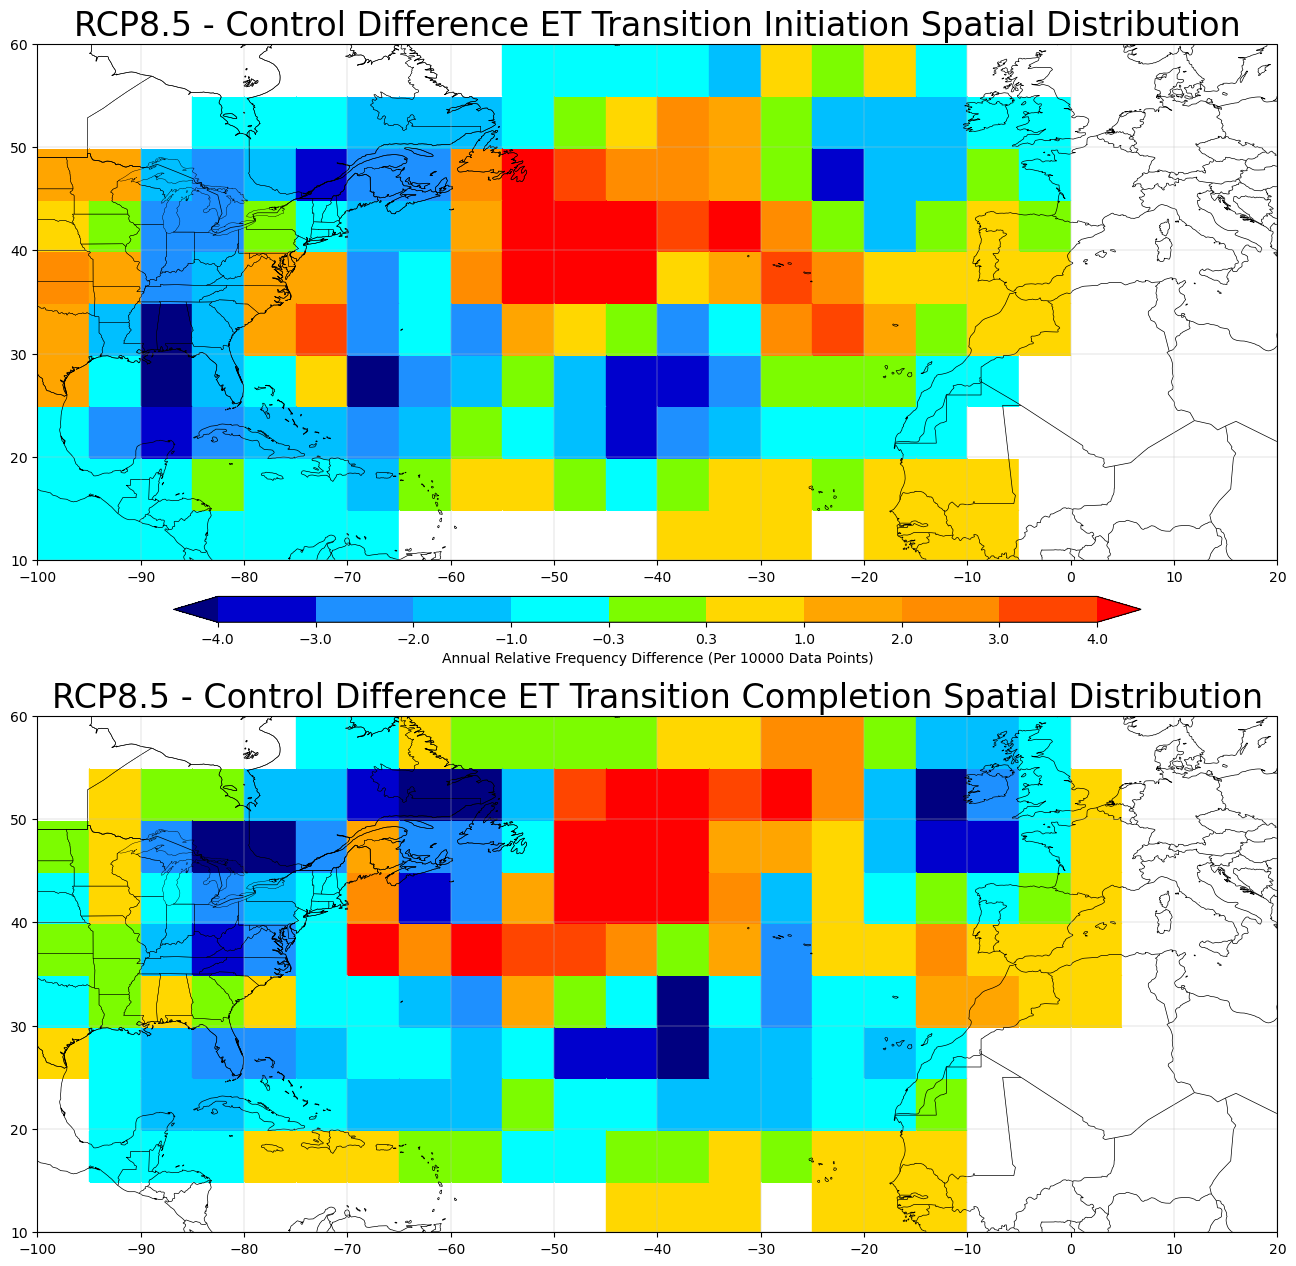

In [34]:
# No Smoothing
Plot_ET_Dist_Diff(RCP85_ET_Start_Density, Control_ET_Start_Density, RCP85_ET_End_Density, \
Control_ET_End_Density, "RCP8.5", "Control", Spatial_Diff_Bounds, Spatial_Diff_Colours, False, False)

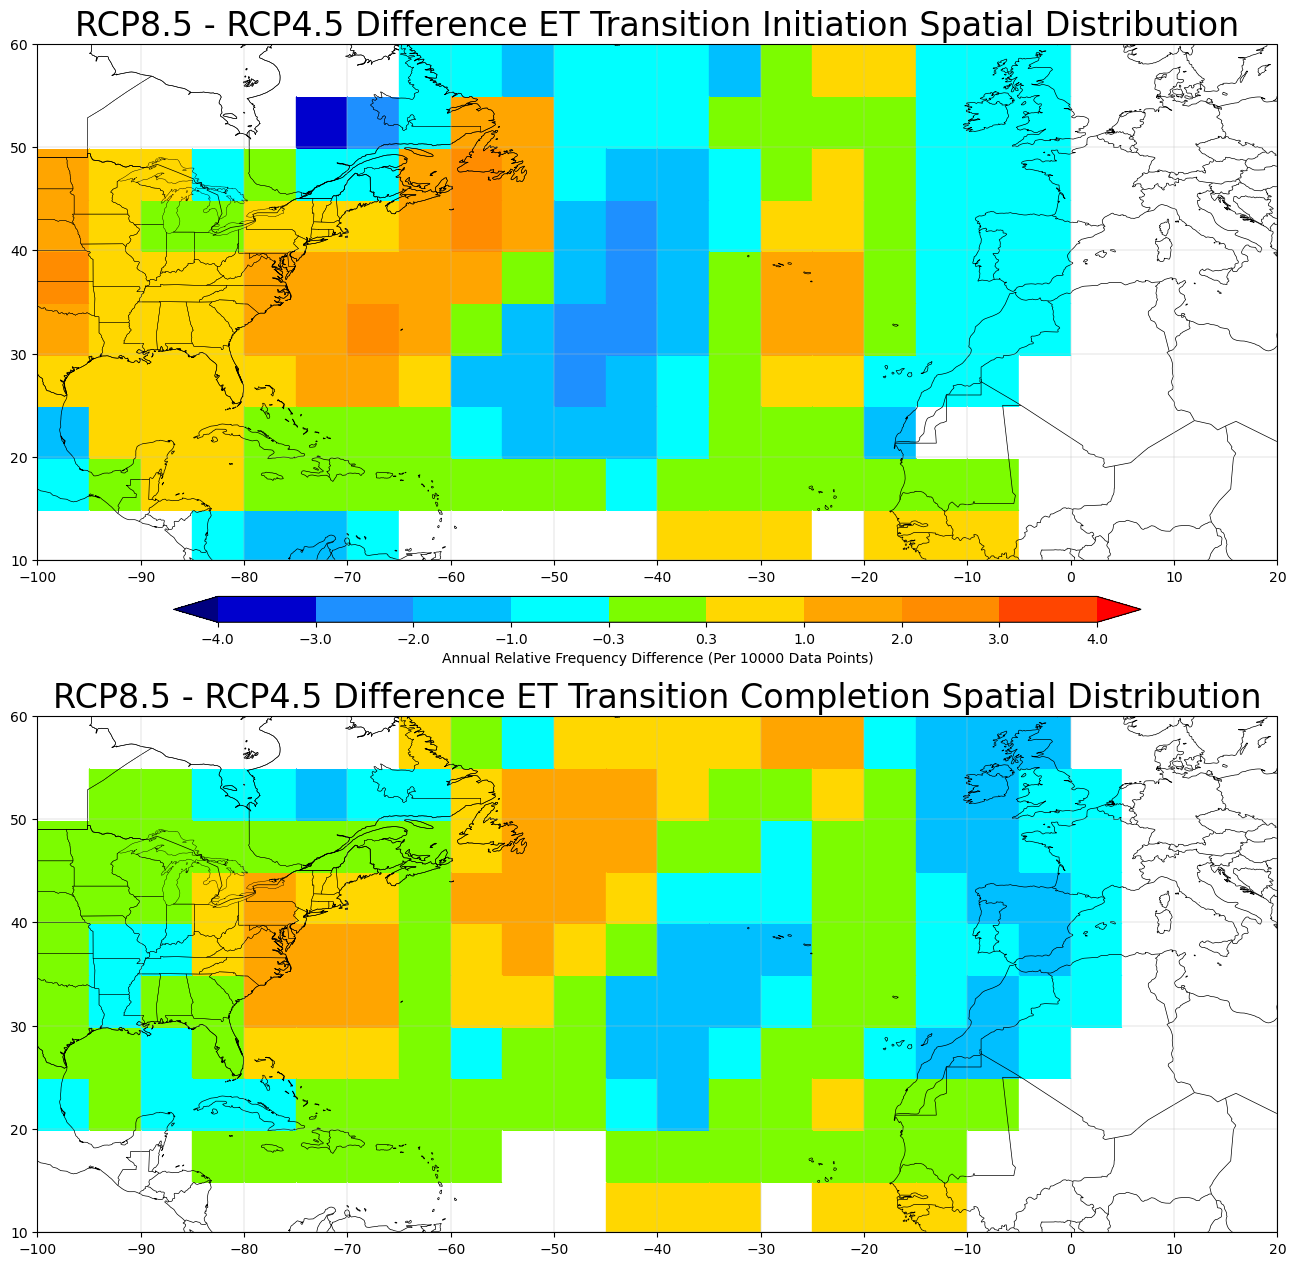

In [35]:
Plot_ET_Dist_Diff(RCP85_ET_Start_Density, RCP45_ET_Start_Density, RCP85_ET_End_Density, \
RCP45_ET_End_Density, "RCP8.5", "RCP4.5", Spatial_Diff_Bounds, Spatial_Diff_Colours, True, True)

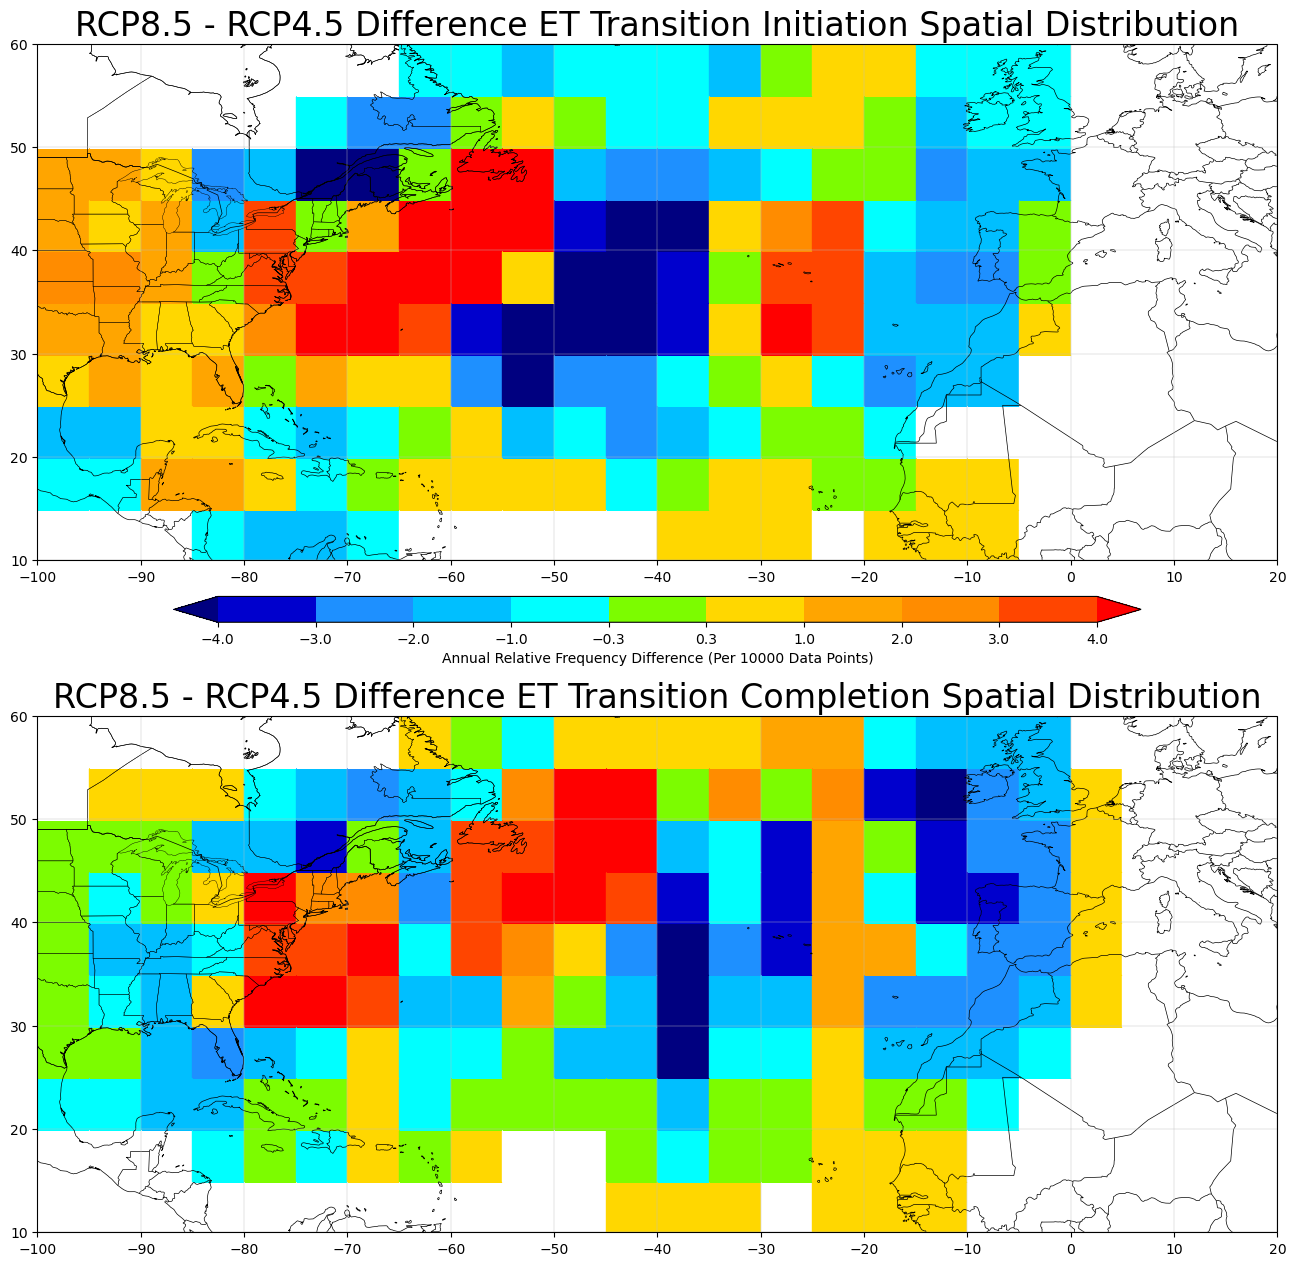

In [36]:
Plot_ET_Dist_Diff(RCP85_ET_Start_Density, RCP45_ET_Start_Density, RCP85_ET_End_Density, \
RCP45_ET_End_Density, "RCP8.5", "RCP4.5", Spatial_Diff_Bounds, Spatial_Diff_Colours, False, False)

In [37]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
Lon_Bins = Create_Bins(-100,20,5)
Lat_Bins = Create_Bins(10,60,5)

#Bins_Bounds = numpy.array([-600,600,50,-45,135,7.5])

In [38]:
# Combine All Three DataFrames
ET_All = pandas.concat([Control_ET, RCP45_ET, RCP85_ET]).reset_index()
ET_All = ET_All.drop("index", axis=1)

In [39]:
# Shuffle Gridboxes
def Grid_Shuffle(Gridboxes, Data):
    Coord = Gridboxes.copy()
    numpy.random.shuffle(Coord)
    Sample_List = []
# Find Sample Datapoint of Each Shuffled Coordiate
    for m in range(len(Gridboxes)):
        k = Coord[m][0]
        l = Coord[m][1]
        Sample_List.append(Data[k][l])
#        print (k,l,Data[k][l])
    Sample = numpy.array(Sample_List)
    return (Sample)

In [40]:
def Convert_Grid(Array_1D, Lat_Len, Lon_Len):
    Grid_2D = numpy.zeros((Lat_Len, Lon_Len))
    for m in range(len(Array_1D)):
        k = int(m / Lon_Len)
        l = m % Lon_Len
#        print (k, l, Array_1D[m])
        Grid_2D[k][l] = Array_1D[m]
    return (Grid_2D)

In [41]:
def Shuffle_Diff(Gridboxes, ET_Start_D1, ET_Start_D2, ET_Start_D3, ET_End_D1, ET_End_D2, ET_End_D3, \
Lat_Len, Lon_Len):
# Shuffle Gridboxes For Each Dataset
    ET_Start_S1 = Grid_Shuffle(Gridboxes, ET_Start_D1)
    ET_Start_S2 = Grid_Shuffle(Gridboxes, ET_Start_D2)
    ET_Start_S3 = Grid_Shuffle(Gridboxes, ET_Start_D3)
    ET_End_S1 = Grid_Shuffle(Gridboxes, ET_End_D1)
    ET_End_S2 = Grid_Shuffle(Gridboxes, ET_End_D2)
    ET_End_S3 = Grid_Shuffle(Gridboxes, ET_End_D3)
#
# Calculate Difference Between Sample Datasets
    ET_Start_S2_S1_1D = ET_Start_S2 - ET_Start_S1
    ET_Start_S3_S1_1D = ET_Start_S3 - ET_Start_S1
    ET_End_S2_S1_1D = ET_End_S2 - ET_End_S1
    ET_End_S3_S1_1D = ET_End_S3 - ET_End_S1
#
# Return 1D Array to 2D Grid
    ET_Start_S2_S1 = Convert_Grid(ET_Start_S2_S1_1D, Lat_Len, Lon_Len)
    ET_Start_S3_S1 = Convert_Grid(ET_Start_S3_S1_1D, Lat_Len, Lon_Len)
    ET_End_S2_S1 = Convert_Grid(ET_End_S2_S1_1D, Lat_Len, Lon_Len)
    ET_End_S3_S1 = Convert_Grid(ET_End_S3_S1_1D, Lat_Len, Lon_Len)
    return (ET_Start_S2_S1, ET_Start_S3_S1, ET_End_S2_S1, ET_End_S3_S1)

In [42]:
def Compare_Count(Sample, Data, Compare):
    if Data < Sample:
        Compare += 0
    elif Data == Sample:
        Compare += 0.5
    elif Data > Sample:
        Compare += 1
    return (Compare)

In [43]:
# Permutation Test
def Permutation_ET_Loc_Points(ET_Start_D1, ET_Start_D2, ET_Start_D3, \
ET_End_D1, ET_End_D2, ET_End_D3, Smoothen, Num):
# Calculate Difference Between Actual Datasets
    if Smoothen == False:
        ET_Start_D2_D1 = Spatial_Diff(ET_Start_D2, ET_Start_D1)
        ET_End_D2_D1 = Spatial_Diff(ET_End_D2, ET_End_D1)
        ET_Start_D3_D1 = Spatial_Diff(ET_Start_D3, ET_Start_D1)
        ET_End_D3_D1 = Spatial_Diff(ET_End_D3, ET_End_D1)
    else:
        ET_Start_D2_D1, ET_End_D2_D1 = Spatial_Diff_New(ET_Start_D2, ET_End_D2, ET_Start_D1, ET_End_D1)
        ET_Start_D3_D1, ET_End_D3_D1 = Spatial_Diff_New(ET_Start_D3, ET_End_D3, ET_Start_D1, ET_End_D1)
#
# Create Array to Store Permutation Counts
    Lat_Len = len(ET_Start_D1)
    Lon_Len = len(ET_Start_D1[0])
    ET_Start_C2_C1 = numpy.zeros((Lat_Len, Lon_Len))
    ET_Start_C3_C1 = numpy.zeros((Lat_Len, Lon_Len))
    ET_End_C2_C1 = numpy.zeros((Lat_Len, Lon_Len))
    ET_End_C3_C1 = numpy.zeros((Lat_Len, Lon_Len))
#
# Create List of Every Gridbox
    Gridboxes_List = []
    for k in range(Lat_Len):
        for l in range(Lon_Len):
            Gridboxes_List.append([k,l])
    Gridboxes = numpy.array(Gridboxes_List)
#
# Use Function to Shuffle Gridboxes and Find Diffs Between Sample Datasets
    for n in range(Num):
        ET_Start_S2_S1, ET_Start_S3_S1, ET_End_S2_S1, ET_End_S3_S1 = Shuffle_Diff(Gridboxes, \
        ET_Start_D1, ET_Start_D2, ET_Start_D3, ET_End_D1, ET_End_D2, ET_End_D3, Lat_Len, Lon_Len)
#
# Compare With Difference Between Actual Datasets
        for k in range(Lat_Len):
            for l in range(Lon_Len):
# Count How Many of Sample Differences are Smaller than the Actual Diff at Each Gridpoint
                ET_Start_C2_C1[k][l] = Compare_Count(ET_Start_S2_S1[k][l], ET_Start_D2_D1[k][l], ET_Start_C2_C1[k][l])
                ET_Start_C3_C1[k][l] = Compare_Count(ET_Start_S3_S1[k][l], ET_Start_D3_D1[k][l], ET_Start_C3_C1[k][l])
                ET_End_C2_C1[k][l] = Compare_Count(ET_End_S2_S1[k][l], ET_End_D2_D1[k][l], ET_End_C2_C1[k][l])
                ET_End_C3_C1[k][l] = Compare_Count(ET_End_S3_S1[k][l], ET_End_D3_D1[k][l], ET_End_C3_C1[k][l])
#        print (n)
#
# Calculate P Value
    ET_Start_P2_P1 = ET_Start_C2_C1 / Num
    ET_Start_P3_P1 = ET_Start_C3_C1 / Num
    ET_End_P2_P1 = ET_End_C2_C1 / Num
    ET_End_P3_P1 = ET_End_C3_C1 / Num
    return (ET_Start_P2_P1, ET_Start_P3_P1, ET_End_P2_P1, ET_End_P3_P1)

In [44]:
ET_Start_P2_P1, ET_Start_P3_P1, ET_End_P2_P1, ET_End_P3_P1 = Permutation_ET_Loc_Points(\
Control_ET_Start_Density, RCP45_ET_Start_Density, RCP85_ET_Start_Density, \
Control_ET_End_Density, RCP45_ET_End_Density, RCP85_ET_End_Density, False, 500)

In [ ]:
print (ET_Start_P2_P1)

In [45]:
def ET_Loc_PVal_Colours(PVal):
    if PVal <= 0.02:
        Colour = 'navy'
    elif PVal <= 0.05:
        Colour = 'dodgerblue'
    elif PVal <= 0.1:
        Colour = 'deepskyblue'
#    elif PVal <= 0.15:
#        Colour = 'cyan'
    elif PVal >= 0.98:
        Colour = 'red'
    elif PVal >= 0.95:
        Colour = 'darkorange'
    elif PVal >= 0.9:
        Colour = 'orange'
#    elif PVal >= 0.85:
#        Colour = 'gold'
    else:
        Colour = 'limegreen'
    return (Colour)

In [46]:
# Create Function to Plot ET Start and End Locations
def Plot_ET_Dist_PVal(ET_Start_PVal, ET_End_PVal, Colours, Savefig):
# Plot ET Start Data
    Fig = pyplot.figure(figsize=(16,16))
    Axis = Fig.add_subplot(2,1,1, projection=ccrs.PlateCarree())
    Lon_Bins = Create_Bins(-100,20,5)
    Lat_Bins = Create_Bins(10,60,5)
    for j in range(len(ET_Start_PVal)):
        for k in range(len(ET_Start_PVal[0])):
            Colour = ET_Loc_PVal_Colours(ET_Start_PVal[j][k])
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis)
#    Title = Model_1 + " - " + Model_2 + " Difference ET Transition Initiation Spatial Distribution"
#    Axis.set_title(Title, fontsize=24)
#
# Colour Bar
#    Cbar_Label = 'Annual Relative Frequency Difference (Per 10000 Data Points)'
#    C_Map = mcolors.LinearSegmentedColormap.from_list("Relative Frequency of Locations", Colours, N=len(Colours))
#    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
#    Cax = Axis.inset_axes([0.11, -0.12, 0.78, 0.05], transform=Axis.transAxes)
#    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, ticks=Bounds, \
#    label=Cbar_Label)
#
# Plot ET End Data
    Axis = Fig.add_subplot(2,1,2, projection=ccrs.PlateCarree())
    for j in range(len(ET_End_PVal)):
        for k in range(len(ET_End_PVal[0])):
            Colour = ET_Loc_PVal_Colours(ET_End_PVal[j][k])
            pyplot.fill_between([Lon_Bins[k], Lon_Bins[k+1]], Lat_Bins[j], Lat_Bins[j+1], color=Colour)
    Plot_Map_Formatting(Axis)
#    Title = Model_1 + " - " + Model_2 + " Difference ET Transition Completion Spatial Distribution"
#    Axis.set_title(Title, fontsize=24)
#
# Save Fig
    if Savefig == True:
        Figname = str(Model_1 + '-' + Model_2 + '_ET_Spatial_Diff.png')
        Fig.savefig('/glade/u/home/whimkao//ExtraTrack/Analysis_Figs_V4/'+Figname, bbox_inches='tight')

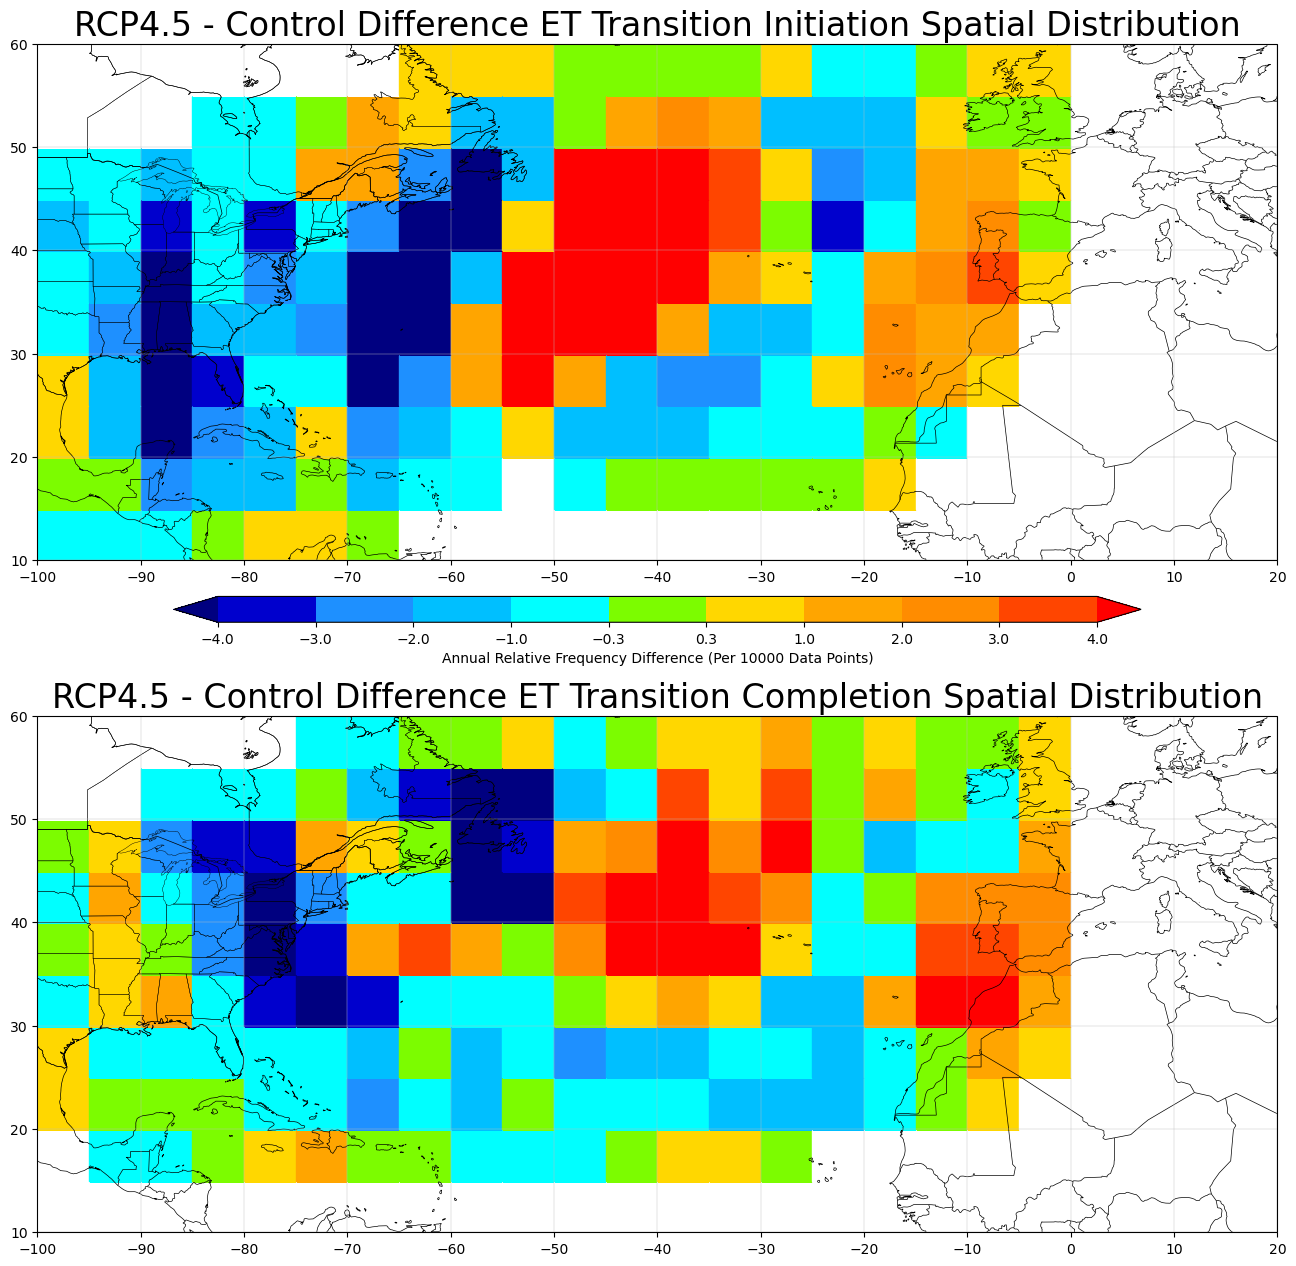

In [48]:
# No Smoothing
Plot_ET_Dist_Diff(RCP45_ET_Start_Density, Control_ET_Start_Density, RCP45_ET_End_Density, \
Control_ET_End_Density, "RCP4.5", "Control", Spatial_Diff_Bounds, Spatial_Diff_Colours, False, False)

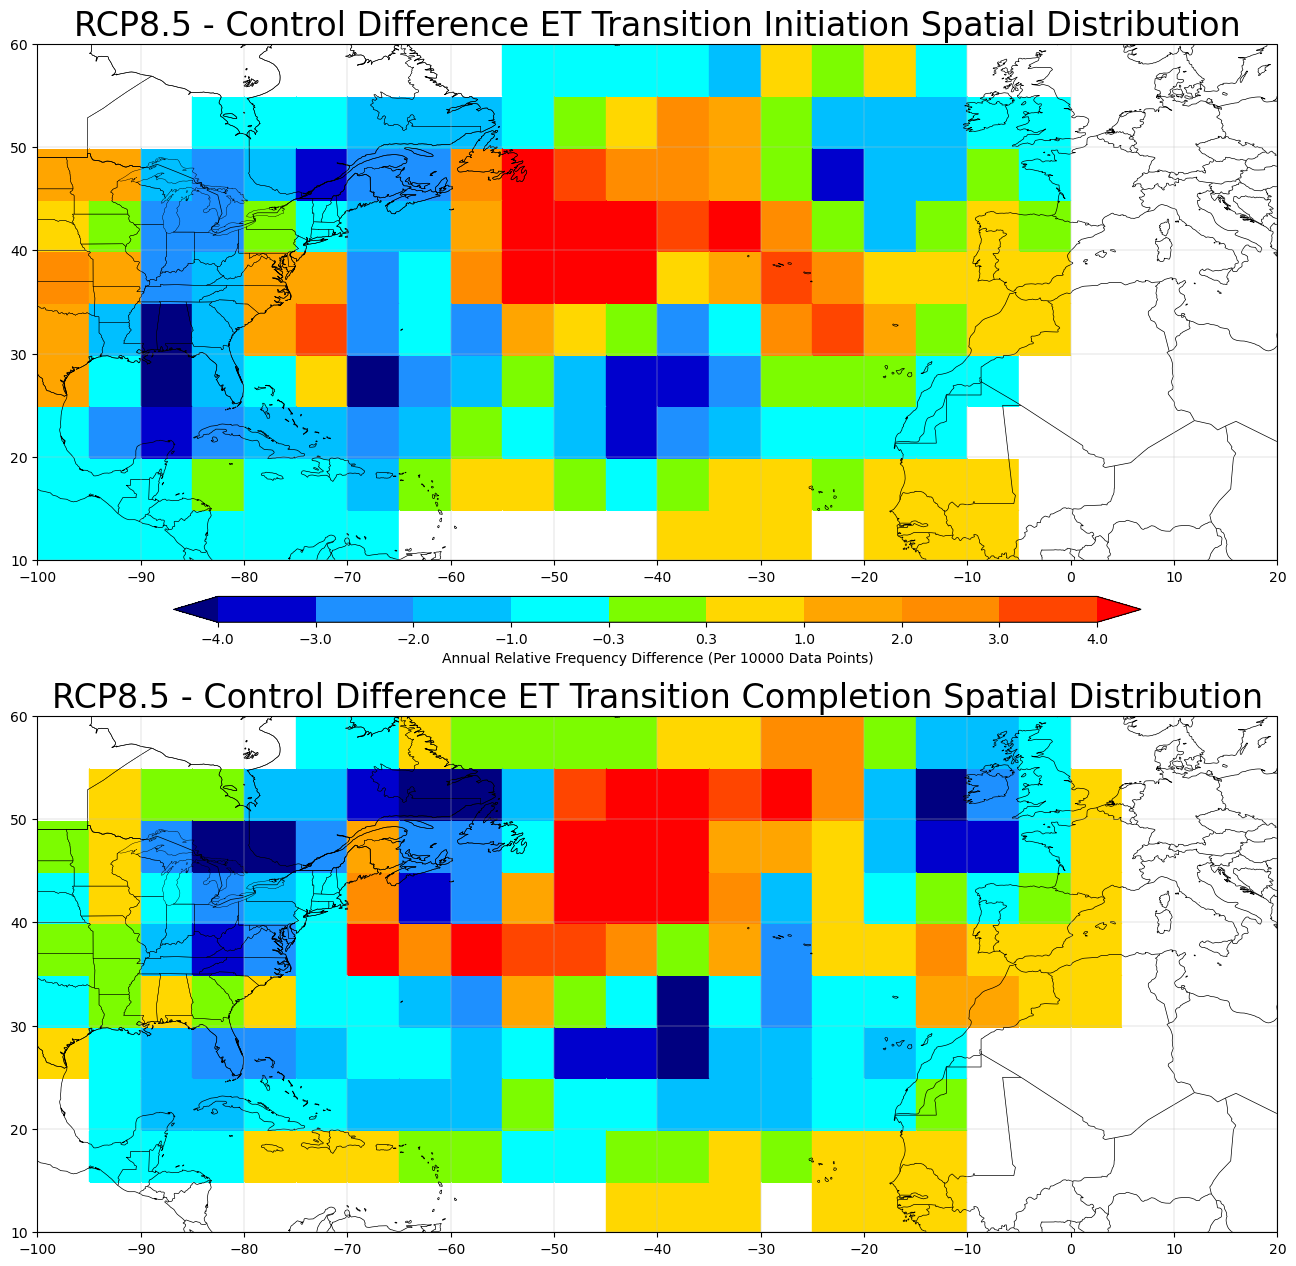

In [50]:
# No Smoothing
Plot_ET_Dist_Diff(RCP85_ET_Start_Density, Control_ET_Start_Density, RCP85_ET_End_Density, \
Control_ET_End_Density, "RCP8.5", "Control", Spatial_Diff_Bounds, Spatial_Diff_Colours, False, False)